In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Overview

In [2]:
df = pd.read_csv('Telco.csv')

In [3]:
df.head(5)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 22)

In [5]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)

In [6]:
df.shape

(7043, 22)

In [7]:
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,customerID,0,100.0
1,MonthlyCharges,0,100.0
2,PaymentMethod,0,100.0
3,PaperlessBilling,0,100.0
4,Contract,0,100.0
5,StreamingMovies,0,100.0
6,StreamingTV,0,100.0
7,TechSupport,0,100.0
8,DeviceProtection,0,100.0
9,OnlineBackup,0,100.0


In [8]:
df.dtypes

customerID           object
Region               object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['TotalCharges'] = df.TotalCharges.astype(float)

In [10]:
df.dtypes

customerID           object
Region               object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df['tenure'].median()

29.0

**From this output, we know that this data doesn't have any missing values anymore. After 11 missing values (blank space from csv) is imputed with 0 on TotalCharges column**

In [13]:
num_features = df.select_dtypes(include=[np.number])
num_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [14]:
cat_features = df.select_dtypes(include=[np.object])
cat_features.columns

Index(['customerID', 'Region', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

# 2. Exploratory Data Analysis

**Class Distribution Between 1/0 (Churn/Stay)**

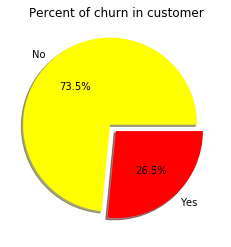

In [15]:
labels = df['Churn'].value_counts(sort = True).index
sizes =  df['Churn'].value_counts(sort = True)

colors = ["yellow","red"]
explode = (0.1,0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=360)

plt.title('Percent of churn in customer')
plt.show()

**Categorical Variable Plot**

ValueError: num must be 1 <= num <= 16, not 17

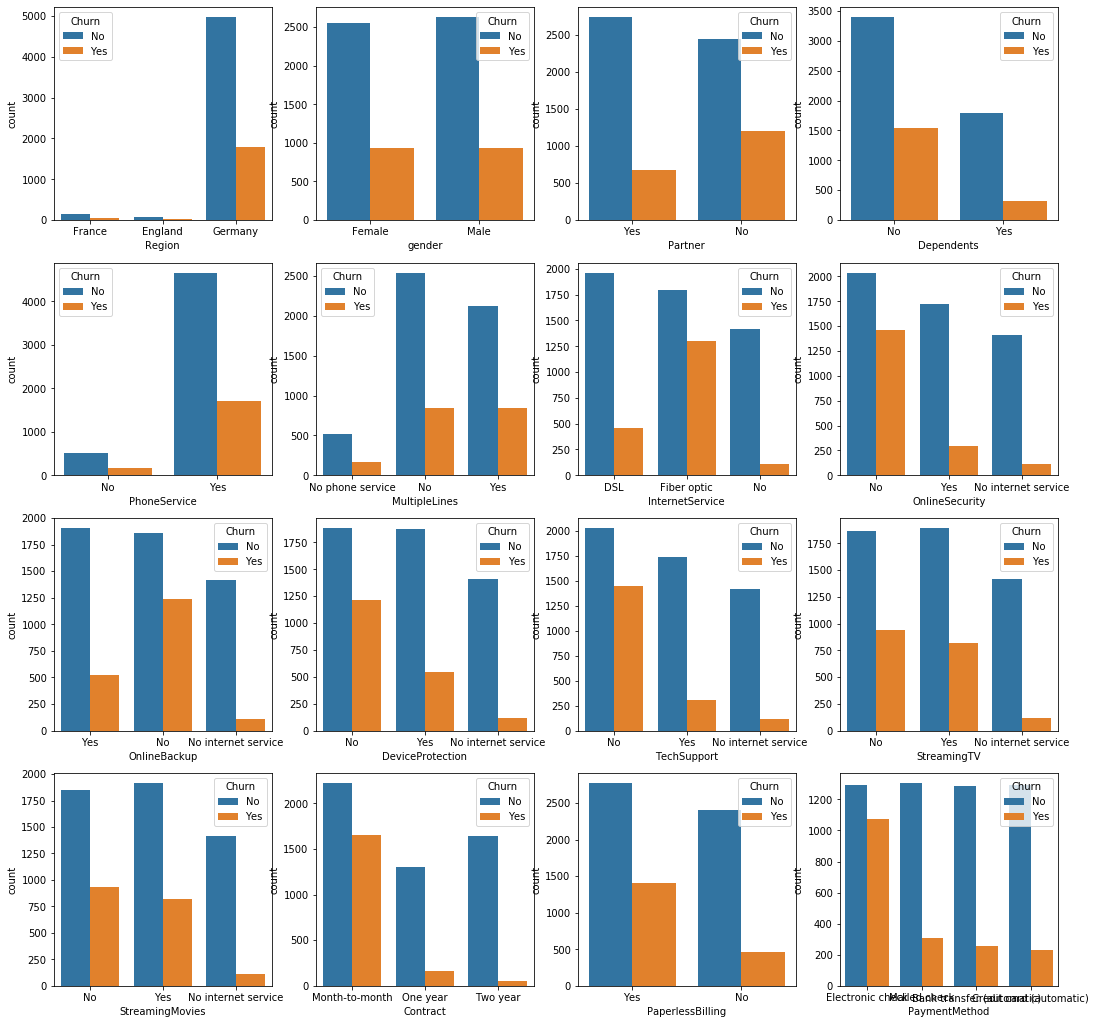

In [16]:
plt.figure(figsize=(18,18))
for k in range(1,len(cat_features.columns)):
    plt.subplot(4,4,k)
    sns.countplot(x=cat_features.columns[k],data=df,hue='Churn')

**Numerical Variable Plot**

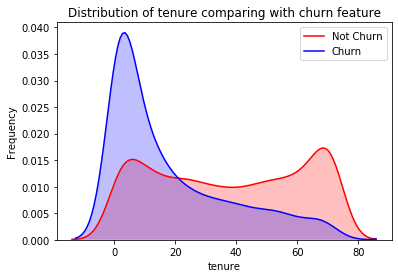

In [17]:
g = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ], color="Red", shade = True)
g = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ], ax =g, color="Blue", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

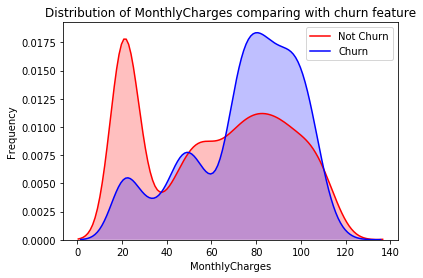

In [18]:
g = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ], color="Red", shade = True)
g = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ], ax =g, color="Blue", shade= True)
g.set_xlabel("MonthlyCharges")
g.set_ylabel("Frequency")
plt.title('Distribution of MonthlyCharges comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

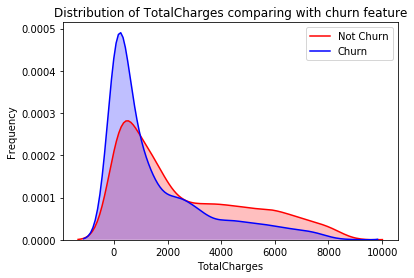

In [19]:
g = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ], color="Red", shade = True)
g = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ], ax =g, color="Blue", shade= True)
g.set_xlabel("TotalCharges")
g.set_ylabel("Frequency")
plt.title('Distribution of TotalCharges comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

In [20]:
df_analysis1 = df[(df['gender']=='Female') & (df['SeniorCitizen']==1)]

In [21]:
df_analysis1.head(5)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
30,3841-NFECX,France,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
50,8012-SOUDQ,France,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
52,6575-SUVOI,France,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No
53,7495-OOKFY,France,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes
54,4667-QONEA,France,Female,1,Yes,Yes,60,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),74.85,4456.35,No


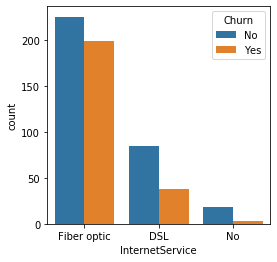

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(x=df_analysis1['InternetService'],data=df_analysis1,hue=df_analysis1['Churn'])

In [23]:
df_analysis2 = df[(df['InternetService']=='Fiber optic')]
df_analysis2.head(10)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,France,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,France,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
8,7892-POOKP,France,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,France,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,France,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,France,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,France,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,France,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
19,4183-MYFRB,France,Female,0,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,No


In [24]:
df_analysis2['PhoneService'].value_counts()

Yes    3096
Name: PhoneService, dtype: int64

In [25]:
df_analysis3 = df[(df['TechSupport']=='No')]
df_analysis3.head(10)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,France,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,France,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,France,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
9,6388-TABGU,France,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,France,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
12,8091-TTVAX,France,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No


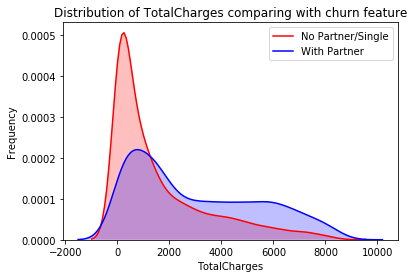

In [26]:
g = sns.kdeplot(df.TotalCharges[(df["Partner"] == 'No') ], color="Red", shade = True)
g = sns.kdeplot(df.TotalCharges[(df["Partner"] == 'Yes') ], ax =g, color="Blue", shade= True)
g.set_xlabel("TotalCharges")
g.set_ylabel("Frequency")
plt.title('Distribution of TotalCharges comparing with churn feature')
g = g.legend(["No Partner/Single","With Partner"])

# 3. Data Preprocessing

In [27]:
df.head(5)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.drop(["customerID"],axis=1,inplace = True)

In [29]:
df.gender = [1 if each == "Male" else 0 for each in df.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[item]]
    
df.head()

,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,France,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,France,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,France,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,France,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,France,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
df = pd.get_dummies(data=df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Region_England,Region_France,Region_Germany,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,0,1,0,1,0,0,0,0,1,0


In [31]:
df1 = df.drop(["Churn"],axis=1)

In [32]:
model_columns = list(df1.columns)

In [33]:
model_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Region_England',
 'Region_France',
 'Region_Germany',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

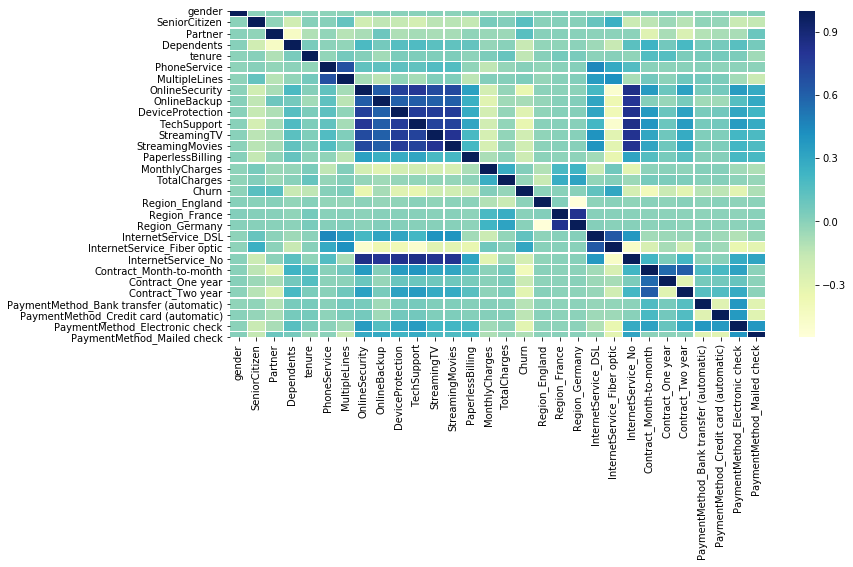

In [34]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [35]:
#assign Class_att column as y attribute
y = df.Churn.values

#drop Class_att column, remain only numerical columns
new_df = df.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_df-np.min(new_df))/(np.max(new_df)-np.min(new_df)).values

In [36]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =1)

# 4. Modeling

In [55]:
#Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

C:\Users\conta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)

C:\Users\conta\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 50, random_state = 1) #set tree number as 33
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [59]:
#XGB Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [63]:
# the function that prints all scores
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [64]:
report_lr = classification_report(y_test, lr_model.predict(x_test))
print(report_lr)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [65]:
report_svc = classification_report(y_test, svc_model.predict(x_test))
print(report_svc)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.55      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [66]:
report_nb = classification_report(y_test, nb_model.predict(x_test))
print(report_svc)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.55      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [67]:
report_rf = classification_report(y_test, rf_model.predict(x_test))
print(report_rf)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.55      0.58       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.80      0.80      0.80      1409



In [68]:
report_xgb = classification_report(y_test, XGB.predict(x_test))
print(report_xgb)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.62      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [70]:
y_pred_xgb = XGB.predict(x_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

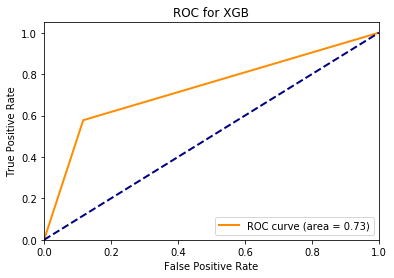

In [71]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for XGB')
plt.legend(loc="lower right")
plt.show()

In [72]:
y_pred_lr = lr_model.predict(x_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

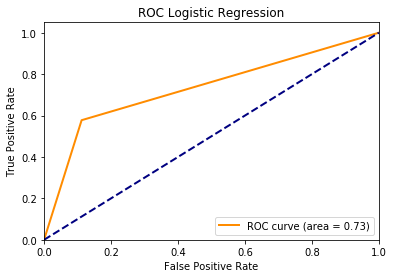

In [73]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [74]:
list(zip(x_train, XGB.feature_importances_))

[('gender', 0.0053493413),
 ('SeniorCitizen', 0.015908226),
 ('Partner', 0.0048347674),
 ('Dependents', 0.0066392133),
 ('tenure', 0.01681006),
 ('PhoneService', 0.013381537),
 ('MultipleLines', 0.011535835),
 ('OnlineSecurity', 0.012299679),
 ('OnlineBackup', 0.006146383),
 ('DeviceProtection', 0.0052974536),
 ('TechSupport', 0.0071827765),
 ('StreamingTV', 0.008233541),
 ('StreamingMovies', 0.013465239),
 ('PaperlessBilling', 0.008146872),
 ('MonthlyCharges', 0.007301896),
 ('TotalCharges', 0.015260729),
 ('Region_England', 0.0),
 ('Region_France', 0.0),
 ('Region_Germany', 0.0),
 ('InternetService_DSL', 0.00077576085),
 ('InternetService_Fiber optic', 0.16268587),
 ('InternetService_No', 0.0),
 ('Contract_Month-to-month', 0.6344085),
 ('Contract_One year', 0.017616408),
 ('Contract_Two year', 0.0),
 ('PaymentMethod_Bank transfer (automatic)', 0.0056620706),
 ('PaymentMethod_Credit card (automatic)', 0.004451547),
 ('PaymentMethod_Electronic check', 0.011209353),
 ('PaymentMethod_Mai

In [75]:
print(lr_model.coef_)

[[-0.03077005  0.19160493  0.02060648 -0.07096934 -3.28033259 -0.67233132
   0.4718398  -0.67249032 -0.28350576 -0.10383836 -0.60948633  0.38096393
   0.58564227  0.3201355  -0.14492928  1.37290992 -0.15198031 -0.10746014
   0.00562552  0.00989232  0.89110463 -1.15481188  0.61488512 -0.05940863
  -0.80929142 -0.13281444 -0.16041415  0.1796522  -0.14023854]]


From the results we have 2 model that performs quite well, Logistic Regression and XGBoost.
in terms of (from the most important in this case) :

- F1 Score (LR : 0.88 - 0.60, XGB :0.87 - 0.60 )
- AUC-ROC (LR : 0.73 , XGB : 0.73 )
- Accuracy (LR : 0.81 , XGB : 0.81 )

Explanation :
- F1 score is the most important metrics bcs of the "quite" imbalance class, which is about 75%-25% for the non-churn and churn
- AUC - ROC is the second most important metrics, it is considered as degree of separability, how well the model perform to separate the 0s as 0s and the 1s as 1s


I decide to use the Logistic Regression in model deployment as it has better performance and the coefficient really could separate the most important features and not important ones

In [76]:
import pickle

filename = 'XGB_model.pkl'
pickle.dump(XGB, open(filename, 'wb'))

In [77]:
column_filename = 'columns.pkl'
pickle.dump(model_columns, open(column_filename, 'wb'))

In [78]:
filename = 'lr_model.pkl'
pickle.dump(lr_model, open(filename, 'wb'))